Importing the essential libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data Visualisation and Analysis

In [60]:
dataset = pd.read_csv("Mall_Customers.csv")

In [61]:
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<AxesSubplot:xlabel='Gender', ylabel='count'>

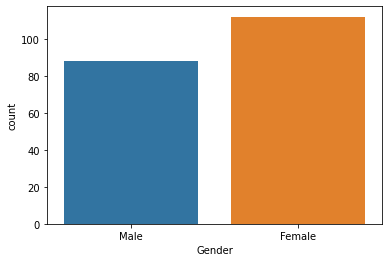

In [62]:
sns.countplot(data=dataset, x = 'Gender')

C:\Users\RMLD\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

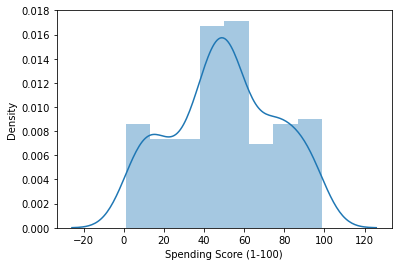

In [63]:
sns.distplot(dataset['Spending Score (1-100)'])

In [64]:
print("Top 5 Spending Scores")
dataset['Spending Score (1-100)'].value_counts()[:5]

Top 5 Spending Scores


42    8
55    7
46    6
73    6
35    5
Name: Spending Score (1-100), dtype: int64

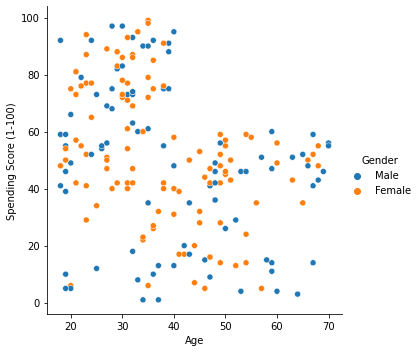

In [65]:
sns.relplot(data=dataset, x='Age', y='Spending Score (1-100)', hue='Gender')

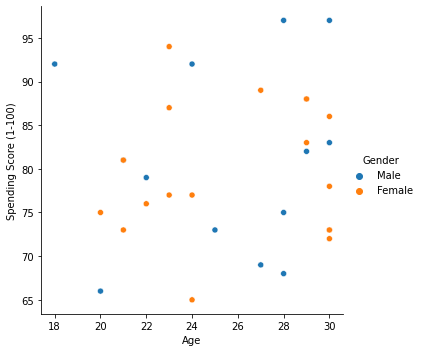

In [66]:
new = []
for i in dataset.values:
    if (i[2]<=30 and i[4]>60):
        new.append(i)
new = pd.DataFrame(new, columns=["CustomerID","Gender","Age","Annual Income (k$)","Spending Score (1-100)"])

sns.relplot(data=new, x = 'Age', y="Spending Score (1-100)", hue='Gender')

In [67]:
dataset['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [68]:
X = dataset.iloc[:,[3,4]].values

Clustering Implementation using K-Means Algorithm

In [69]:
from sklearn.cluster import KMeans
wcss = list()
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

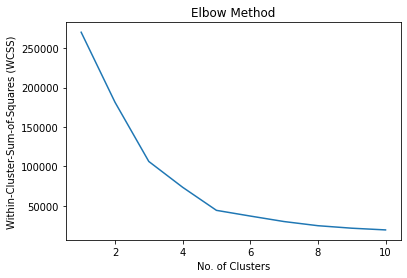

In [70]:
plt.plot(range(1,11),wcss)
plt.title("Elbow Method")
plt.xlabel('No. of Clusters')
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')
plt.show()

Training the K-Means Model on the dataset

In [72]:
# Optimum Number of Clusters is 5

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

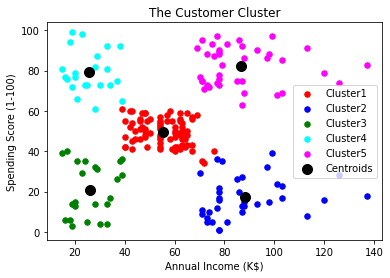

In [76]:
plt.scatter(X[y_kmeans == 0,0],X[y_kmeans==0,1],s=30,c='red',label='Cluster1')
plt.scatter(X[y_kmeans == 1,0],X[y_kmeans==1,1],s=30,c='blue',label='Cluster2')
plt.scatter(X[y_kmeans == 2,0],X[y_kmeans==2,1],s=30,c='green',label='Cluster3')
plt.scatter(X[y_kmeans == 3,0],X[y_kmeans==3,1],s=30,c='cyan',label='Cluster4')
plt.scatter(X[y_kmeans == 4,0],X[y_kmeans==4,1],s=30,c='magenta',label='Cluster5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'black', label = 'Centroids')
plt.title('The Customer Cluster')
plt.xlabel('Annual Income (K$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()